# GEOL 2001: Boulder Creek Rainfall Data

## Introduction

Rain is a fundamental part of the water budget, and rainfall arrives in patterns that vary from time to time and from place to place. If you or someone you know lived in Boulder in 2013, you may recall the 2013 Colorado Floods. From September 11 to 15, a record amount of rain fell in Boulder County. In this lab, we will examine real data to explore local precipitation patterns and to appreciate just how incredible this flood event was.

So far in this course, we've learned how to use Excel to generate, manipulate, and visualize data. Proficiency in Excel is a very important skill to have as a scientist, but there is also a rising demand for geologists to be literate in scientific coding. Therefore, this lab will introduce you to the Python programming language. As usual, our lab exercise will begin in Excel, but this time the first thing we'll learn how to do is save Excel data in a format that can easily be imported and read in a programming language. 

## Learning goals
By the end of this lab, students will be able to:
- Import data from Excel into Python
- Perform basic indexing and operations on dataframes in Python 
- Make data visualizations in Python
- Explain the concepts of "average" and "standard deviation"
- Discuss temporal precipitation patterns in Boudler, CO
- Interpret, compare, and contrast precipitation data from multiple locations

## Part 1: Importing data

You should have access to a .xlsx file named `Lab5Excel_Rainfalldata.xlsx`. Open this file in Excel as usual, and you will see that it contains daily rainfall records. For the purpose of this lab, we're interested in both the annual rainfall and monthly rainfall records. We can convert our large amount of daily data (over 40,000 records!) into annual and monthly totals by creating pivot tables in Excel. 

Create two pivot tables in Excel: one to sum the amount of precipitation for each year of record, and one to sum the amount of precipitation per month for each year of record. Make sure these pivot tables are stored on separate sheets in Excel. 

For each pivot table, go to `File > Save As`. Change the filename to either `yearly_totals` or `monthly_totals.` From the dropdown menu, choose `CSV UTF-8 (*.csv)` as the filetype to save as.

Upload your `yearly_totals.csv` and `monthly_totals.csv` to whichever platform is hosting your Jupyter Notebook.

Excellent! Now that our data is in `.csv` format, Python will be able to read it. We'll use a Python library called `pandas` to read our data; you'll see that the data is output in table ('dataframe') format, which looks similar to Excel.

In [1]:
# import libraries needed for today's lab

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### A few words on libraries

The code cell above import three Python "libraries" that we'll use in today's exercise. Libraries contain pre-made functions that you can use to perform different operations. Today we'll use:

`numpy`: great for basic mathematical operations, such as calculating the mean or taking square roots. We've imported this library under the alias `np`, so in order to access its functions you must first type `np.`

`matplotlib`: great for creating plots to visualize your data. We've imported this library under the alias `plt`, so in order to access its functions you must first type `plt.`

`pandas`: creates "dataframes" which are a bit like an Excel worksheet. They are structures that hold data in rows and columns, and you can give your rows and columns names to help make the data easier to interpret. We've imported this library under the alias `pd`, so in order to access its functions you must first type `pd.`

In [2]:
# read in yearly and monthly data as a pandas dataframe
# be sure to specifiy the full file path!

yearly_data = pd.read_csv('data/yearly_totals.csv', header = 0)
monthly_data = pd.read_csv('data/monthly_totals.csv', header = 0, skiprows = 1)

In [3]:
# we can use the pandas function .head() to inspect our dataframes
# we'll use the yearly data first

yearly_data.head()

,Year,Sum of Precip (inches)
0,1897,15.75
1,1898,15.95
2,1899,13.93
3,1900,16.88
4,1901,13.85


Our yearly data looks pretty good! However, it's better practice to use metric units. Add a column named `Sum of Precip (mm)`. You can do this by performing a unit conversion from inches to millimeters on the existing `Sum of Precip (inches)` column.

In [4]:
# add a new column to our dataframe
# there are 25.4 mm in 1 inch

yearly_data['Sum of Precip (mm)'] = yearly_data['Sum of Precip (inches)'] * 25.4

# inspect our dataframe again to make sure the changes look right

yearly_data.head()

,Year,Sum of Precip (inches),Sum of Precip (mm)
0,1897,15.75,400.050
1,1898,15.95,405.130
2,1899,13.93,353.822
3,1900,16.88,428.752
4,1901,13.85,351.790


Everything looks good so far. Python's `numpy` library makes it easy to calculate summary statistics. Below, calculate the mean, minimum, maximum, and standard deviation for `Sum of Precip (mm)` from your `yearly_data` dataframe. Add these as columns to your dataframe, as well.

In [5]:
# get summary statistics
# we use the indexing [0:-1] to exclude the final row in the dataframe, since this row contains grand totals

yearly_data['Minimum (mm)'] = np.min(yearly_data['Sum of Precip (mm)'])
yearly_data['Maximum (mm)'] = np.max(yearly_data['Sum of Precip (mm)'])
yearly_data['Mean (mm)'] = np.mean(yearly_data['Sum of Precip (mm)'])
yearly_data['Standard deviation (mm)'] = np.std(yearly_data['Sum of Precip (mm)'])

# check out the dataframe

yearly_data.head()

,Year,Sum of Precip (inches),Sum of Precip (mm),Minimum (mm),Maximum (mm),Mean (mm),Standard deviation (mm)
0,1897,15.75,400.050,220.726,867.41,475.670966,115.565467
1,1898,15.95,405.130,220.726,867.41,475.670966,115.565467
2,1899,13.93,353.822,220.726,867.41,475.670966,115.565467
3,1900,16.88,428.752,220.726,867.41,475.670966,115.565467
4,1901,13.85,351.790,220.726,867.41,475.670966,115.565467


Time to plot! First we'll make one plot of the total annual rainfall versus year. Then we'll calculate the residuals for each year and plot that as well. This will allow us to inspect which years had the highest variation away from the 'average' rainfall.

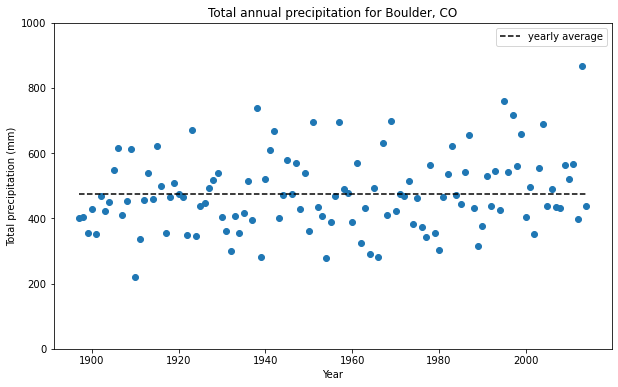

In [6]:
# plot total annual rainfall against year
# add a horizontal line at y = 476 to illustrate the average annual rainfall

# set figure size

plt.figure(figsize = (10, 6))

# create plot

plt.scatter(yearly_data['Year '], yearly_data['Sum of Precip (mm)'])
plt.ylim([0, 1000])
plt.hlines(y = 476, xmin = 1897, xmax = 2014, linestyle = '--', label = 'yearly average')
plt.xlabel('Year')
plt.ylabel('Total precipitation (mm)')
plt.title('Total annual precipitation for Boulder, CO')
plt.legend()
plt.show()

### Pause

Make two observations about this plot. Type your answers below.

In [7]:
# convert this cell to markdown and type your answer here

Now we want to make a plot of 'residuals.' This will illustrate for us how each year's rainfall varies from the average. To do this, we'll subtract the average rainfall from the actual rainfall for each year. Make a new column in your dataframe called `Residuals (mm)`. As before, we can create this column by performing operations on existing columns - in this case, we'll subtract `Mean (mm)` from `Sum of Precip (mm)`.


In [8]:
# create a residuals column

yearly_data['Residuals (mm)'] = yearly_data['Sum of Precip (mm)'] - yearly_data['Mean (mm)']

# check it out 

yearly_data.head()

,Year,Sum of Precip (inches),Sum of Precip (mm),Minimum (mm),Maximum (mm),Mean (mm),Standard deviation (mm),Residuals (mm)
0,1897,15.75,400.050,220.726,867.41,475.670966,115.565467,-75.620966
1,1898,15.95,405.130,220.726,867.41,475.670966,115.565467,-70.540966
2,1899,13.93,353.822,220.726,867.41,475.670966,115.565467,-121.848966
3,1900,16.88,428.752,220.726,867.41,475.670966,115.565467,-46.918966
4,1901,13.85,351.790,220.726,867.41,475.670966,115.565467,-123.880966


Great, time to plot again!

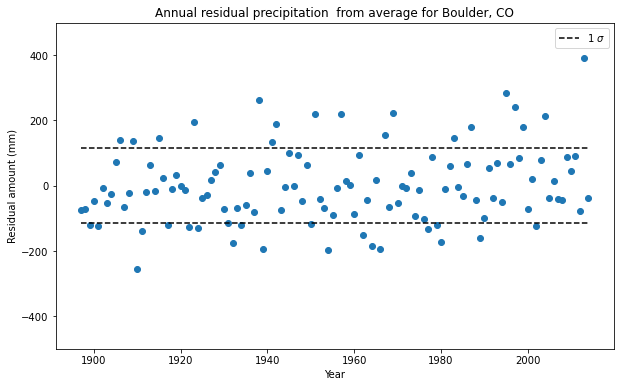

In [9]:
# plot total annual rainfall against year
# add horizontal lines at y = 115 and y = -115 to illustrate the bounds of standard deviation

# enlarge figure

plt.figure(figsize = (10, 6))

# create plot

plt.scatter(yearly_data['Year '], yearly_data['Residuals (mm)'])
plt.ylim([-500, 500])
plt.hlines(y = 115, xmin = 1897, xmax = 2014, linestyle = '--', label = '1 $\sigma$')
plt.hlines(y = -115, xmin = 1897, xmax = 2014, linestyle = '--')
plt.xlabel('Year')
plt.ylabel('Residual amount (mm)')
plt.title('Annual residual precipitation  from average for Boulder, CO')
plt.legend()
plt.show()

### Pause

Make two observations about this plot. Type your answers below.

In [10]:
# convert this cell to markdown and type your answers here

We now have a sense for the variation in rainfall that Boulder receives on an annual basis, and we can see from our plots that 2013 was a year of extraordinarily high rainfall - the highest in 117 years of records! But there was something else unusual about the 2013 flood: the <i>timing</i> of the event. To illustrate what I mean by this, we'll make another plot. This one will help us to visualize the temporal pattern of rainfall throughout a typical year in Boulder. 

This part of the lab will use the second dataset that we imported, which we saved in a dataframe called `monthly_data`. Before we can plot, we need to make some modifications to our `monthly_data` dataframe.

In [11]:
# check out the monthly_data dataframe

monthly_data.head()

,Year,1,2,3,4,5,6,7,8,9,10,11,12
0,1897,0.00,0.00,0.00,0.00,2.30,3.71,3.09,2.96,0.86,1.66,0.47,0.70
1,1898,0.43,0.55,0.67,1.54,3.76,1.33,0.97,1.45,1.12,0.90,1.93,1.30
2,1899,0.87,0.98,2.79,1.13,0.53,0.58,2.19,1.81,0.15,1.94,0.00,0.96
3,1900,0.40,1.06,0.75,9.17,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61
4,1901,0.53,0.30,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,0.00,1.43


Yikes! There are two things we should observe here: first of all, the measurements are in inches again. This time, we <i>won't</i> convert to millimeters, because we'll end this lab with a comparison of rainfall in another city that's also reported in inches. In order to make the comparison, we need the units to match on both datasets.

Another problem here is that the columns aren't very easy to read. We know we're looking at monthly data, so let's rename our columns with the names of the months.

In [12]:
# rename columns

monthly_data.columns = ['Year', 
                        'Jan', 
                        'Feb', 
                        'Mar', 
                        'Apr', 
                        'May', 
                        'Jun', 
                        'Jul', 
                        'Aug', 
                        'Sep', 
                        'Oct', 
                        'Nov', 
                        'Dec']

# check it out

monthly_data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1897,0.00,0.00,0.00,0.00,2.30,3.71,3.09,2.96,0.86,1.66,0.47,0.70
1,1898,0.43,0.55,0.67,1.54,3.76,1.33,0.97,1.45,1.12,0.90,1.93,1.30
2,1899,0.87,0.98,2.79,1.13,0.53,0.58,2.19,1.81,0.15,1.94,0.00,0.96
3,1900,0.40,1.06,0.75,9.17,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61
4,1901,0.53,0.30,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,0.00,1.43


Great, now we're ready to start making a visualization of yearly precipitation pattern in Boulder. In order to do this, we need to find monthly precipitation averages and standard deviations. We'll do this by using `numpy` operations on our `monthly_data` dataframe.

In [13]:
# averages

jan_avg = np.mean(monthly_data['Jan'])
feb_avg = np.mean(monthly_data['Feb'])
mar_avg = np.mean(monthly_data['Mar'])
apr_avg = np.mean(monthly_data['Apr'])
may_avg = np.mean(monthly_data['May'])
jun_avg = np.mean(monthly_data['Jun'])
jul_avg = np.mean(monthly_data['Jul'])
aug_avg = np.mean(monthly_data['Aug'])
sep_avg = np.mean(monthly_data['Sep'])
oct_avg = np.mean(monthly_data['Oct'])
nov_avg = np.mean(monthly_data['Nov'])
dec_avg = np.mean(monthly_data['Dec'])

# standard deviations

jan_std = np.std(monthly_data['Jan'])
feb_std = np.std(monthly_data['Feb'])
mar_std = np.std(monthly_data['Mar'])
apr_std = np.std(monthly_data['Apr'])
may_std = np.std(monthly_data['May'])
jun_std = np.std(monthly_data['Jun'])
jul_std = np.std(monthly_data['Jul'])
aug_std = np.std(monthly_data['Aug'])
sep_std = np.std(monthly_data['Sep'])
oct_std = np.std(monthly_data['Oct'])
nov_std = np.std(monthly_data['Nov'])
dec_std = np.std(monthly_data['Dec'])

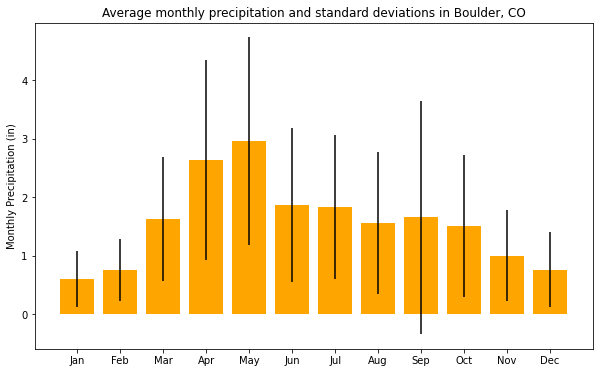

In [14]:
# create figure and axis

plt.figure(figsize = (10, 6))

# create figure 

plt.bar('Jan', jan_avg, yerr = jan_std, color = 'orange')
plt.bar('Feb', feb_avg, yerr = feb_std, color = 'orange')
plt.bar('Mar', mar_avg, yerr = mar_std, color = 'orange')
plt.bar('Apr', apr_avg, yerr = apr_std, color = 'orange')
plt.bar('May', may_avg, yerr = may_std, color = 'orange')
plt.bar('Jun', jun_avg, yerr = jun_std, color = 'orange')
plt.bar('Jul', jul_avg, yerr = jul_std, color = 'orange')
plt.bar('Aug', aug_avg, yerr = aug_std, color = 'orange')
plt.bar('Sep', sep_avg, yerr = sep_std, color = 'orange')
plt.bar('Oct', oct_avg, yerr = oct_std, color = 'orange')
plt.bar('Nov', nov_avg, yerr = nov_std, color = 'orange')
plt.bar('Dec', dec_avg, yerr = dec_std, color = 'orange')
plt.ylabel('Monthly Precipitation (in)')
plt.title('Average monthly precipitation and standard deviations in Boulder, CO')
plt.show()

### Pause

Make two observations about this plot. Is there anything unusual about the timing of the September 2013 flood? Type your answers below.

In [15]:
# convert this cell to markdown and type answers here

Cool plot! We now have visual representations of how much precipitation Boulder has received over the last 117 years, and how that percipitation tends to be distributed throughout the year. The last thing we want to do is consider how Boulder differs from other places in the United States. As an example, we'll look at some data from Seattle.

<img src="data/seattle_rainfall.png" width = 500>

### Pause

Make two comparisons between this plot from Seattle and our similar plot from Boulder. How does the temporal pattern of rainfall vary? How about variation in monthly rainfall? Think about the geologic settings of these two cities. What environmental factors might be impacting the precipitation patterns in these two cities?

## Congratulations, you made it to the end!